# Install necessary Libraries

### Step 1: Extract Text from the PDF

We’ll use the PyMuPDF library (fitz) to extract text from the PDF. This library is effective for handling structured text, such as reports and tables, commonly found in survey data.

#### Extracting text from PDF

In [5]:
import fitz  # PyMuPDF

# Function to extract text from each page in the PDF
def extract_text_from_pdf(file_path):

    print("\nExtracting text from the file...")

    # Open the PDF file
    document = fitz.open(file_path)
    text_data = []

    # Iterate through each page
    for page_num in range(document.page_count):
        page = document[page_num]
        page_text = page.get_text()  # Extract text from page
        text_data.append(page_text)

    document.close()
    print("\nCompleted successfully!")
    return text_data

In [6]:
# Path to the PDF file
# file_path = 'files/Final_SAS 2023_Annual Report.pdf'
file_path = 'files/Agricult_data.pdf'
pdf_text = extract_text_from_pdf(file_path)


Extracting text from the file...

Completed successfully!


In [7]:
def display_extracted_text(pdf_text):
    print("\nSample of first few pages of extracted text:\n")

    # Check the first few pages to see the extracted text
    for i, page in enumerate(pdf_text[:3]):
        print(f"--- Page {i+1} ---")
        print(page[:500])  # Print first 500 characters for preview

In [8]:
display_extracted_text(pdf_text)


Sample of first few pages of extracted text:

--- Page 1 ---
[ 
    { 
    "instruction": "Answer the following question", 
    "input": "What are some methods for improving soil fertility?", 
    "response": "Improving soil fertility can be achieved through various 
methods such as crop rotation, cover cropping, and adding organic matter 
like compost or manure. Additionally, using green manures, practicing 
conservation tillage, and applying appropriate fertilizers based on soil 
testing can help enhance soil fertility and promote healthier plant 
growt
--- Page 2 ---
or brush piles, and avoiding or minimizing pesticide use to protect 
pollinator populations. Creating diverse landscapes with a variety of 
flowering plants and maintaining habitat corridors can also support 
pollinator health and biodiversity on the farm." 
    }, 
    { 
    "instruction": "Answer the following question", 
    "input": "What are some methods for improving soil health in organic 
farming?", 
    "resp

### Step 2: Text Preprocessing

We’ll implement the following preprocessing steps:

- Remove Extra Spaces and Line Breaks: To make the text easier to work with.

- Split Text into Sentences: This will help with processing the text sentence by sentence during entity extraction.

- Normalize Case and Remove Unwanted Characters: For consistent analysis, we’ll standardize the case and remove characters like page numbers, special symbols, etc.

In [9]:
import re
import nltk
from nltk.tokenize import sent_tokenize

# download nltk toketizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ahmed Issah
[nltk_data]     Tahiru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Ahmed Issah
[nltk_data]     Tahiru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
# Function to preprocess text
def preprocess_text(text_data):
    
    print("\nPreprocessing extracted text...")

    processed_text = []

    for page_text in text_data:
        # Remove any extraneous whitespace and newlines
        page_text = page_text.replace('\n', ' ').strip()

        # Remove unwanted characters like page numbers or table of contents markers
        page_text = re.sub(r'\bPage\s\d+\b', '', page_text)
        page_text = re.sub(r'[^a-zA-Z0-9\s.,]', '', page_text)

        # Convert text to lowercase
        page_text = page_text.lower()

        # Tokenize text into sentences
        sentences = sent_tokenize(page_text)

        # Store cleaned sentences
        processed_text.extend(sentences)

    print("\nCompleted successfully!")

    return processed_text

In [16]:
# Apply preprocessing to the extracted text
cleaned_text = preprocess_text(pdf_text)


Preprocessing extracted text...

Completed successfully!


In [17]:
# Function to display preprocessed text
def display_preprocessed_text(cleaned_text):

    print("\nSample of first few cleaned sentences:\n")

    # Display the first few cleaned sentences
    for i, sentence in enumerate(cleaned_text[:20]):
        print(f"Sentence {i+1}: {sentence}")

In [18]:
# display preprocessed text
display_preprocessed_text(cleaned_text)


Sample of first few cleaned sentences:

Sentence 1:             instruction answer the following question,      input what are some methods for improving soil fertility,      response improving soil fertility can be achieved through various  methods such as crop rotation, cover cropping, and adding organic matter  like compost or manure.
Sentence 2: additionally, using green manures, practicing  conservation tillage, and applying appropriate fertilizers based on soil  testing can help enhance soil fertility and promote healthier plant  growth.
Sentence 3: ,            instruction answer the following question,      input how can i prevent erosion on my farmland,      response preventing erosion on farmland involves implementing  conservation practices like contour plowing, terracing, and planting  windbreaks or cover crops.
Sentence 4: maintaining vegetation along waterways,  installing silt fences, and using erosion control blankets can also help  minimize soil erosion and protect th

#### Step 3: Entity Extraction

We’ll use spaCy, an NLP library that provides pre-trained models for named entity recognition (NER), part-of-speech tagging, and other text processing tasks.

3.1 Install spaCy and Download Language Model
If not already installed, we’ll install spaCy and download the en_core_web_sm model, which is spaCy's small English language model.

In [45]:
# %pip install spacy
# %python -m spacy download en_core_web_sm

3.2 Extracting Entities

In [19]:
import spacy

# Load spaCy's pre-trained English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Function to extract entities from the text
def extract_entities(text_data):
    
    print("\nExtracting entitites...")

    entities = []

    for sentence in text_data:

        # Process each sentence using spaCy's NLP pipeline
        doc = nlp(sentence)

        for ent in doc.ents:
            # Append each recognized entity and its label
            entities.append((ent.text, ent.label_))

    print("\Completed successfully!")
    

    return entities

In [48]:
# apply entity extraction on the cleaned text
extracted_entities = extract_entities(cleaned_text)

In [74]:
# Function to display a sample of extracted entities
def display_extracted_entities(extracted_entities):

    print("\nSample of extracted entities:\n")

    for i, entity in enumerate(extracted_entities[:20]):
        print(f"Entity {i+1}: Text: '{entity[0]}', Label: {entity[1]}")

In [75]:
# Display a sample of extracted entities
display_extracted_entities(extracted_entities)


Sample of extracted entities:

Entity 1: Text: 'rwanda', Label: GPE
Entity 2: Text: '2023  annual', Label: DATE
Entity 3: Text: 'december 2023', Label: DATE
Entity 4: Text: 'seasonal', Label: DATE
Entity 5: Text: 'national institute of statistics', Label: ORG
Entity 6: Text: 'rwanda', Label: GPE
Entity 7: Text: 'annual', Label: DATE
Entity 8: Text: 'the national institute of  statistics', Label: ORG
Entity 9: Text: 'rwanda', Label: GPE
Entity 10: Text: 'the agricultural year 20222023', Label: DATE
Entity 11: Text: 'three', Label: CARDINAL
Entity 12: Text: 'rwanda', Label: GPE
Entity 13: Text: 'september 2022', Label: DATE
Entity 14: Text: 'february 2023, season', Label: DATE
Entity 15: Text: 'march to', Label: DATE
Entity 16: Text: 'june 2023', Label: DATE
Entity 17: Text: 'july', Label: DATE
Entity 18: Text: 'september 2023', Label: DATE
Entity 19: Text: '1,200', Label: CARDINAL
Entity 20: Text: '345', Label: CARDINAL


Entity Types to Note for Agricultural Data
- ORG: Organizations or institutions (e.g., "National Institute of Statistics of Rwanda").
- DATE: Dates, which may relate to crop seasons.
- GPE/LOC: Geopolitical entities or locations relevant to land use or agricultural regions.
- CARDINAL/QUANTITY: Quantities often related to measurements or crop statistics.

### Step 4: Relationship Extraction

We’ll analyze the extracted sentences to identify relationships between entities. For instance, relationships like "maize grows in" a specific season or "fertilizer applied to" certain crops can provide valuable insights for building a structured knowledge graph.

We’ll use dependency parsing, which identifies syntactic relationships between words in a sentence. spaCy’s dependency parser will help us capture these relationships, focusing on:

- Subject-Verb-Object (SVO) triples: Common in sentences that describe actions, like "farmers use fertilizers."
- Prepositional Phrases: Often contain location or temporal data, like "in season A."

##### Extracting Relationships

In [ ]:
# Function to extract relationships from sentences

def extract_relationships(text_data):

    print("\nExtracting relationships...")


    # container to store extracted relationships
    relationships = []

    # Loop through each sentence in the text to extract relationships 
    for sentence in text_data:
        doc = nlp(sentence)

        # Define placeholders for entities and relationships
        subject = None
        predicate = None
        obj = None

        # Dependency parsing to identify SVO structure
        for token in doc:

            # Find the subject (usually a noun or a compound noun)
            if "subj" in token.dep_:
                subject = token.text

            # Fint the object (usually a noun or a compound noun)
            elif "obj" in token.dep_:
                obj = token.text

            # Find the main verb (predicate of the sentence)
            elif token.pos_ == "VERB":
                # Use lemma for consistent verbs (e.g., 'use' vs 'used')
                predicate = token.lemma_

        # If SVO structure is found, store the relationship
        if subject and predicate and obj:
            relationships.append((subject, predicate, obj))

    return relationships

In [51]:
# Apply relationship extraction on cleaned text
extracted_relationships = extract_relationships(cleaned_text)

In [76]:
# Function to display a sample of extracted relationships
def display_extracted_relationships(extracted_relationships):
    
    print("\nSample of extracted relationships:\n")

    for i, relationship in enumerate(extracted_relationships[:20]):
        print(f"Relationship {i+1}: Subject: '{relationship[0]}', Predicate: '{relationship[1]}', Object: '{relationship[2]}'")

In [77]:
# display a sample of extracted relationships
display_extracted_relationships(extracted_relationships)


Sample of extracted relationships:

Relationship 1: Subject: 'which', Predicate: 'cover', Object: 'rwanda'
Relationship 2: Subject: 'sas', Predicate: 'combine', Object: 'frame'
Relationship 3: Subject: 'it', Predicate: 'cover', Object: 'segments'
Relationship 4: Subject: 'it', Predicate: 'screen', Object: 'phases'
Relationship 5: Subject: 'phase', Predicate: 'cultivate', Object: 'plots'
Relationship 6: Subject: 'who', Predicate: 'grow', Object: 'season'
Relationship 7: Subject: 'it', Predicate: 'target', Object: 'seasons'
Relationship 8: Subject: 'estimates', Predicate: 'give', Object: 'district'
Relationship 9: Subject: 'census', Predicate: 'conduct', Object: 'years'
Relationship 10: Subject: 'it', Predicate: 'include', Object: 'inputs'
Relationship 11: Subject: '57.5', Predicate: 'use', Object: 'agriculture'
Relationship 12: Subject: 'hectares', Predicate: 'use', Object: 'pasture'
Relationship 13: Subject: '56.6', Predicate: 'use', Object: 'agriculture'
Relationship 14: Subject: 'he

### Step 5: Building the DKG with NetworkX

We’ll use the extracted entities and relationships to create a structured knowledge graph that models the agricultural information.

To build the knowledge graph, we’ll use the NetworkX library in Python. This will allow us to represent entities as nodes and relationships as edges, creating a graph that can be easily updated and queried.

In [53]:
# %pip install networkx

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize an empty directed graph
G = nx.DiGraph()

In [ ]:
# Function to build the knowledge graph from entities and relationships
def build_knowledge_graph_networkx(entities, relationships):

    print("\nBuilding knowledge Graph...")

    # Add entities as nodes
    for entity, entity_type in entities:
        G.add_node(entity, label=entity_type)

    # Add relationships as edges
    for subject, predicate, obj in relationships:
        G.add_edge(subject, obj, label=predicate)

    return G

In [ ]:
# Build the graph using extracted entities and relationships
knowledge_graph = build_knowledge_graph_networkx(extracted_entities, extracted_relationships)

In [57]:
# %pip install spicy

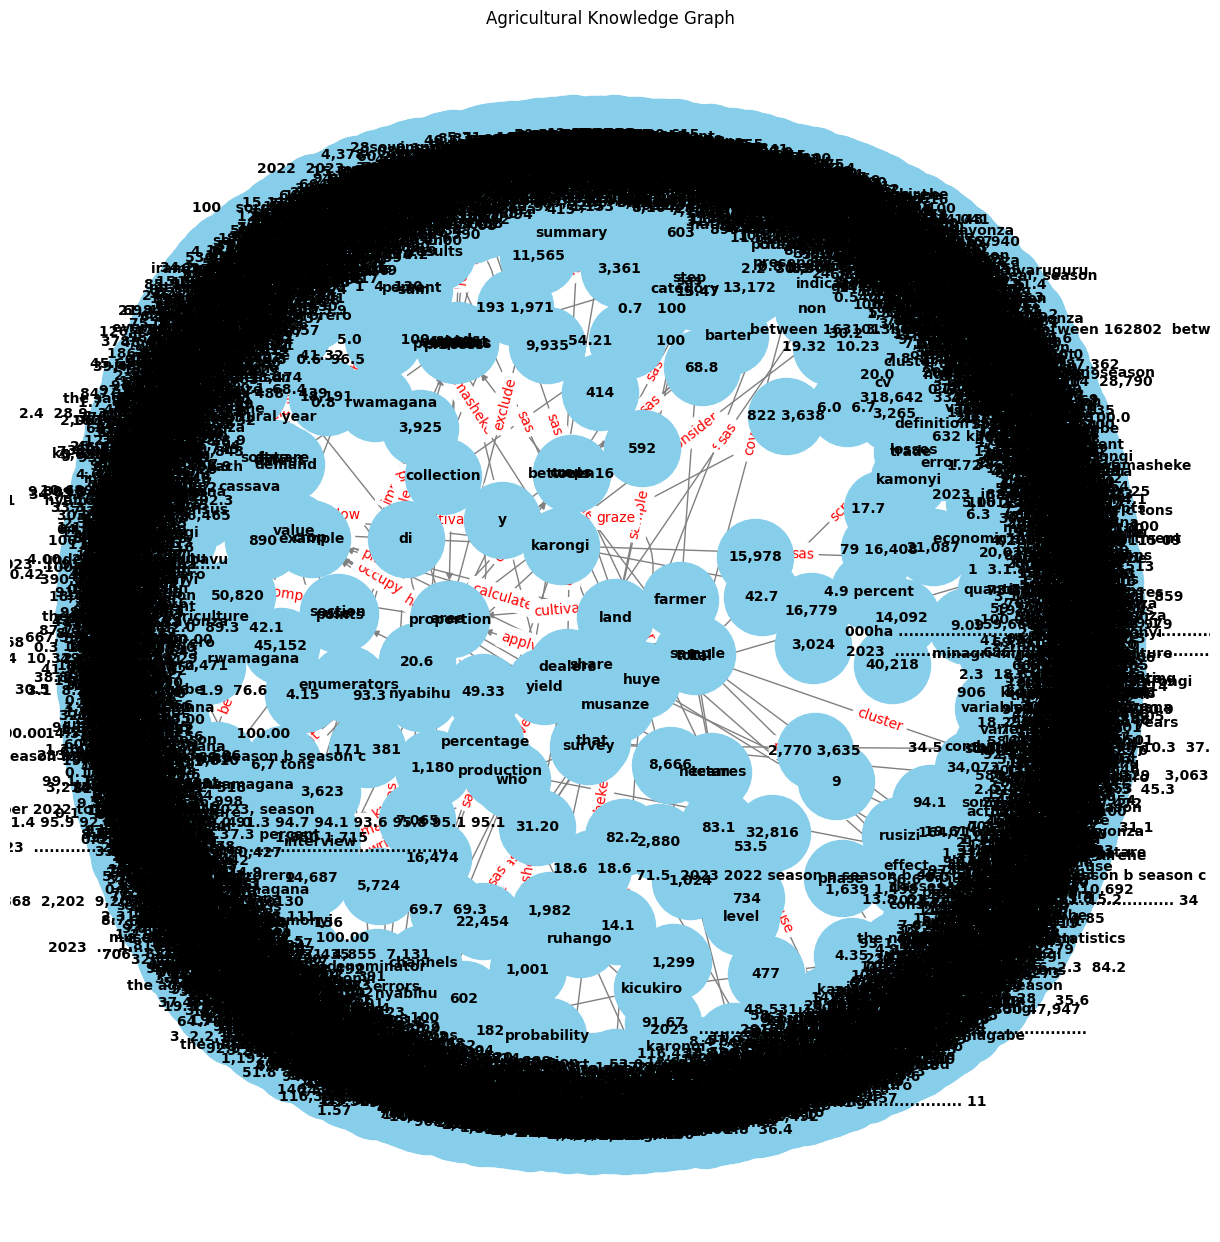

In [58]:
# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(knowledge_graph, seed=42)  # Layout for visualization
nx.draw(knowledge_graph, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
edge_labels = nx.get_edge_attributes(knowledge_graph, "label")
nx.draw_networkx_edge_labels(knowledge_graph, pos, edge_labels=edge_labels, font_color="red")
plt.title("Agricultural Knowledge Graph")
plt.show()

In [59]:
import networkx as nx
import plotly.graph_objects as go

# Generate the layout for nodes
pos = nx.spring_layout(knowledge_graph, seed=42)

# Extract node and edge information
edge_x = []
edge_y = []
for edge in knowledge_graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Create node trace
node_x = []
node_y = []
node_text = []
for node in knowledge_graph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(str(node))  # Node labels

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition="top center",
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2)
)

# Add labels to edges
edge_labels = nx.get_edge_attributes(knowledge_graph, "label")
edge_text = []
for edge in knowledge_graph.edges():
    label = edge_labels.get(edge, "")
    edge_text.append(label)
    edge_text.append("")
    edge_text.append("")

edge_label_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    text=edge_text,
    mode="text",
    textposition="middle center",
    hoverinfo="text",
    textfont=dict(color="red", size=8)
)



In [60]:
# %pip install nbformat>=4.2.0

In [61]:
# Plot the graph
fig = go.Figure(data=[edge_trace, node_trace, edge_label_trace],
                layout=go.Layout(
                    title="Agricultural Knowledge Graph",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()


In [78]:
import os
from pyvis.network import Network
from IPython.core.display import HTML

def save_graph(G, output_path: str):
    """Save and visualize the graph using Pyvis."""
    # Ensure output directory exists
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Create Pyvis network
    net = Network(notebook=True, height="750px", width="100%",
                  bgcolor="#ffffff", font_color="black",
                  cdn_resources='remote')

    # Set physics options for layout
    net.set_options("""
    var options = {
        "nodes": {
            "font": {"size": 12},
            "size": 20
        },
        "edges": {
            "color": {"color": "#000000", "opacity": 0.5},
            "font": {"size": 10},
            "smooth": false
        },
        "physics": {
            "barnesHut": {
                "gravitationalConstant": -2000,
                "centralGravity": 0.3,
                "springLength": 200
            },
            "minVelocity": 0.75
        }
    }
    """)

    # Define color mapping for node types
    colors = {
        "PERSON": "#ff7f7f",
        "COMPANY": "#90EE90",
        "BANK": "#DDA0DD",
        "COUNTRY": "#87CEEB",
        "SCANDAL": "#FFD700"
    }

    # Add nodes with colors based on their 'type' attribute
    for node, attr in G.nodes(data=True):
        node_color = colors.get(attr.get('type', ''), "#97C2FC")  # Default color if no type matches
        net.add_node(node, label=node, color=node_color)

    # Add edges with labels based on their 'relation_type' attribute
    for source, target, attr in G.edges(data=True):
        edge_label = attr.get('relation_type', '')
        net.add_edge(source, target, label=edge_label, arrows="to")

    # Save the graph as an HTML file
    html_file = os.path.join(output_path, "knowledge_graph.html")
    net.save_graph(html_file)

    # Display the graph in a Jupyter Notebook
    with open(html_file, 'r', encoding='utf-8') as f:
        html_content = f.read()
    return HTML(html_content)


### 6.1: Extract Schema from Current Data

In [79]:
from collections import defaultdict

# Function to generate schema from entities and relationships
def generate_schema(entities, relationships):

    # Collect unique entity types
    entity_types = set(entity_type for _, entity_type in entities)
    
    # Initialize dictionary to store relationship types
    relationship_types = defaultdict(set)

    # Populate relationship types based on current relationships
    for subject, predicate, obj in relationships:

        # Check if the subject and object have associated types
        subject_type = next((etype for ename, etype in entities if ename == subject), None)
        obj_type = next((etype for ename, etype in entities if ename == obj), None)

        # Only add if both subject_type and obj_type exist
        if subject_type and obj_type:
            relationship_types[(subject_type, obj_type)].add(predicate)

    # Convert relationship_types to a more readable format
    relationship_schema = {k: list(v) for k, v in relationship_types.items()}

    # Construct schema
    schema = {
        "entities": list(entity_types),
        "relationships": relationship_schema
    }
    return schema


In [80]:
# Generate schema based on extracted entities and relationships
auto_generated_schema = generate_schema(extracted_entities, extracted_relationships)

# Display the generated schema
print("Auto-Generated Schema:")
print(auto_generated_schema)

Auto-Generated Schema:
{'entities': ['CARDINAL', 'DATE', 'GPE', 'PERSON', 'ORDINAL', 'QUANTITY', 'PRODUCT', 'PERCENT', 'WORK_OF_ART', 'NORP', 'TIME', 'ORG', 'MONEY'], 'relationships': {('GPE', 'CARDINAL'): ['sas'], ('PERSON', 'CARDINAL'): ['sas', 'nyamasheke'], ('PERSON', 'ORG'): ['sas', 'gakenke']}}


In [88]:
auto_generated_schema

{'entities': ['CARDINAL',
  'DATE',
  'GPE',
  'PERSON',
  'ORDINAL',
  'QUANTITY',
  'PRODUCT',
  'PERCENT',
  'WORK_OF_ART',
  'NORP',
  'TIME',
  'ORG',
  'MONEY'],
 'relationships': {('GPE', 'CARDINAL'): ['sas'],
  ('PERSON', 'CARDINAL'): ['sas', 'nyamasheke'],
  ('PERSON', 'ORG'): ['sas', 'gakenke']}}

### 7: Real-Time Updates with Schema Validation

We’ll implement a way to update the Dynamic Knowledge Graph (DKG) using the auto-generated schema. This will ensure new data is validated against the existing structure, keeping the graph consistent and accurate.

In this step, we’ll:

1. Validate New Data: Check that new entities and relationships align with the schema.
2. Add Validated Data to the DKG: Update the graph with new data, preserving structure and relationships.
3. Flag Inconsistent Data: If data doesn’t match the schema, it will be flagged for manual review.

#### Function to to Real-Time Updates of the KG while storing Flagged Data

In [98]:
def update_knowledge_graph_with_flagging(new_entities, new_relationships, graph, schema):
    global flagged_entities, flagged_relationships
    
    # Add entities with validation and ensure all nodes have a "label" attribute
    for entity, entity_type in new_entities:
        if entity_type in schema["entities"]:
            graph.add_node(entity, label=entity_type)
        else:
            flagged_entities.append((entity, entity_type))

    # Add relationships with validation and handle missing labels
    for subject, predicate, obj in new_relationships:
        if graph.has_node(subject) and graph.has_node(obj):
            # Use get() with default label if missing
            subject_type = graph.nodes[subject].get("label", "Unknown")
            obj_type = graph.nodes[obj].get("label", "Unknown")
            
            valid_predicates = schema["relationships"].get((subject_type, obj_type), [])
            if predicate in valid_predicates:
                graph.add_edge(subject, obj, label=predicate)
            else:
                flagged_relationships.append((subject, predicate, obj))
        else:
            flagged_relationships.append((subject, predicate, obj))

    print(f"Flagged Entities: {flagged_entities}")
    print(f"Flagged Relationships: {flagged_relationships}")


#### Pipeline for New Data Extraction from PDF

We’ll create a pipeline function to process a PDF file, extract new entities and relationships, and pass them to update_knowledge_graph_with_flagging.

In [ ]:
def process_new_pdf(file_path):
    # Extract text from PDF
    pdf_text = extract_text_from_pdf(file_path)
    
    # Preprocess extracted text
    cleaned_text = preprocess_text(pdf_text)
    
    # Extract entities and relationships
    new_entities = extract_entities(cleaned_text)
    new_relationships = extract_relationships(cleaned_text)
    
    # Update knowledge graph with validation and flagging
    update_knowledge_graph_with_flagging(new_entities, new_relationships, knowledge_graph, auto_generated_schema)
    
    # Return flagged items for review
    return flagged_entities, flagged_relationships



Flagged Entities: []
Flagged Relationships: [('objectives', 'sas', 'ii'), ('land', 'cover', '2.1.2'), ('objectives', 'sas', 'ii'), ('land', 'cover', '2.1.2'), ('survey', 'yield', '2.4.4'), ('tables', 'annex', '49'), ('list', 'harvest', 'crop'), ('who', 'practice', 'practices'), ('5', 'sample', 'points'), ('statistics', 'evidencebase', 'making'), ('demand', 'increase', 'data'), ('survey', 'relate', 'use'), ('data', 'monitor', 'coffee'), ('nisr', 'follow', 'seasons'), ('julyseptember', 'grow', 'zone'), ('segments', 'survey', 'threeyears'), ('report', 'detail', 'a.'), ('that', 'describe', 'use'), ('results', 'evidencebase', 'sector'), ('survey', 'cultivate', 'land'), ('it', 'harvest', 'kilograms'), ('survey', 'harvest', 'hectare'), ('it', 'examine', 'seeds'), ('survey', 'include', 'irrigation'), ('sas', 'sample', 'methodology'), ('sample', 'draw', 'which'), ('frame', 'complement', 'frame'), ('which', 'represent', 'frame'), ('construction', 'cover', 'segments'), ('classification', 'sample'

In [ ]:
# Extract text, preprocess and extract entities and relationships from new data file
file_path = 'files/Seasonal Agricultural Survey (Season A, 2024).pdf'
flagged_entities, flagged_relationships = process_new_pdf(file_path)


Flagged Entities: []
Flagged Relationships: [('objectives', 'sas', 'ii'), ('land', 'cover', '2.1.2'), ('objectives', 'sas', 'ii'), ('land', 'cover', '2.1.2'), ('survey', 'yield', '2.4.4'), ('tables', 'annex', '49'), ('list', 'harvest', 'crop'), ('who', 'practice', 'practices'), ('5', 'sample', 'points'), ('statistics', 'evidencebase', 'making'), ('demand', 'increase', 'data'), ('survey', 'relate', 'use'), ('data', 'monitor', 'coffee'), ('nisr', 'follow', 'seasons'), ('julyseptember', 'grow', 'zone'), ('segments', 'survey', 'threeyears'), ('report', 'detail', 'a.'), ('that', 'describe', 'use'), ('results', 'evidencebase', 'sector'), ('survey', 'cultivate', 'land'), ('it', 'harvest', 'kilograms'), ('survey', 'harvest', 'hectare'), ('it', 'examine', 'seeds'), ('survey', 'include', 'irrigation'), ('sas', 'sample', 'methodology'), ('sample', 'draw', 'which'), ('frame', 'complement', 'frame'), ('which', 'represent', 'frame'), ('construction', 'cover', 'segments'), ('classification', 'sample'

#### Review and Confirm Flagged Data

Next, we’ll create a function for the user to review flagged data. If the user confirms, we’ll add the entity or relationship to the graph and update the schema.

In [146]:
def review_and_confirm(flagged_entities, flagged_relationships, graph, schema):
    # Process flagged entities
    for entity, entity_type in flagged_entities:
        user_input = input(f"Confirm entity '{entity}' as type '{entity_type}'? (y/n): ")
        if user_input.lower() == "y":
            # Add entity to graph and schema, ensure it has a label
            graph.add_node(entity, label=entity_type)
            print(f"{entity} added to graph")
            if entity_type not in schema["entities"]:
                schema["entities"].append(entity_type)
                print(f"{entity_type} added to schema")


    # Process flagged relationships
    for subject, predicate, obj in flagged_relationships:
        # Ensure subject and object nodes have labels
        if not graph.has_node(subject):
            graph.add_node(subject, label="Unknown")
        if not graph.has_node(obj):
            graph.add_node(obj, label="Unknown")
        
        # Retrieve labels, setting a default if missing
        subject_type = graph.nodes[subject].get("label", "Unknown")
        obj_type = graph.nodes[obj].get("label", "Unknown")

        # Prompt user for confirmation of relationship
        user_input = input(f"Confirm relationship '{subject} - {predicate} - {obj}'? (y/n): ")
        if user_input.lower() == "y":
            # Add relationship to graph and update schema if necessary
            graph.add_edge(subject, obj, label=predicate)
            print(f"relationship added to graph")
            if (subject_type, obj_type) not in schema["relationships"]:
                schema["relationships"][(subject_type, obj_type)] = [predicate]
                print(f"relationship added to schema")

            elif predicate not in schema["relationships"][(subject_type, obj_type)]:
                schema["relationships"][(subject_type, obj_type)].append(predicate)
                print(f"relationship added to schema")


# Example usage: Reviewing flagged items
review_and_confirm(flagged_entities, flagged_relationships, knowledge_graph, auto_generated_schema)


In [102]:
auto_generated_schema

{'entities': ['CARDINAL',
  'DATE',
  'GPE',
  'PERSON',
  'ORDINAL',
  'QUANTITY',
  'PRODUCT',
  'PERCENT',
  'WORK_OF_ART',
  'NORP',
  'TIME',
  'ORG',
  'MONEY'],
 'relationships': {('GPE', 'CARDINAL'): ['sas'],
  ('PERSON', 'CARDINAL'): ['sas', 'nyamasheke'],
  ('PERSON', 'ORG'): ['sas', 'gakenke'],
  ('Unknown', 'Unknown'): ['cover',
   'harvest',
   'practice',
   'evidencebase',
   'increase',
   'relate',
   'monitor',
   'follow',
   'grow',
   'survey',
   'detail',
   'describe',
   'cultivate',
   'examine',
   'include',
   'sample',
   'draw',
   'complement',
   'represent',
   'target',
   'base',
   'exclude',
   'make',
   'use',
   'have',
   'consider',
   'state',
   'mention',
   'distribute',
   'sas',
   'report',
   'occur',
   'process',
   'eliminate',
   'observe',
   'conduct',
   'calculate'],
  ('Unknown', 'CARDINAL'): ['annex'],
  ('CARDINAL', 'Unknown'): ['sample', 'designate', 'show']}}

### Sample QA

In [ ]:
# import openai
from openai import OpenAI

# Set up OpenAI API key
my_openai_key = "sk-OJ2_gW9HAKApES_5DbyRODLahM36bT13evmH3wxERkT3BlbkFJ5fwb2Eq-euILAFeg8IeJp5lw3MSHOxRFyB7Agjn28A"

client = OpenAI(api_key="sk-OJ2_gW9HAKApES_5DbyRODLahM36bT13evmH3wxERkT3BlbkFJ5fwb2Eq-euILAFeg8IeJp5lw3MSHOxRFyB7Agjn28A")

In [141]:

# Function to extract knowledge graph data based on keywords
def query_knowledge_graph(graph, keywords):
    results = []
    for node in graph.nodes:
        if any(keyword in node.lower() for keyword in keywords):
            label = graph.nodes[node].get("label", "Unknown")
            results.append((node, label))
    for edge in graph.edges(data=True):
        subject, obj, data = edge
        if any(keyword in subject.lower() for keyword in keywords) or any(keyword in obj.lower() for keyword in keywords):
            relation = data.get("relation", "Unknown")
            results.append((subject, relation, obj))
    return results

# Function to query the LLM with knowledge graph context
def query_llm_with_kg(question, graph):
    keywords = question.lower().split()
    kg_data = query_knowledge_graph(graph, keywords)
    
    # Construct context from knowledge graph findings
    context = "Relevant Knowledge Graph Data:\n"
    for item in kg_data:
        if len(item) == 2:
            context += f"- Entity: {item[0]}, Type: {item[1]}\n"
        elif len(item) == 3:
            context += f"- Relationship: {item[0]} - {item[1]} -> {item[2]}\n"
    
    # Combine context with question
    prompt = f"{context}\n\nQuestion: {question}"
    
    # Query LLM with combined prompt
    chat_completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant specialized in agricultural knowledge."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=150,
        temperature=0.1
    )
    
    answer = chat_completion.choices[0].message.content.strip()
    return answer




In [145]:
# Example usage
question = "What crops grow in season C in Rwanda?"
print(query_llm_with_kg(question, knowledge_graph))

In Rwanda, some of the crops that are known to grow during season C include maize, beans, sorghum, sweet potatoes, cassava, bananas, and vegetables like cabbage, carrots, and onions. These crops are typically planted and harvested during specific seasons based on the country's agricultural calendar and climatic conditions. It's important to note that crop cultivation practices and specific crop varieties may vary depending on the region and local farming practices.


The intuition behind this approach is to use the knowledge graph to enhance the LLM's response. Instead of relying solely on the LLM's pre-trained knowledge, the knowledge graph provides domain-specific, structured data (e.g., facts, relationships, entities) relevant to the user's query. This context is added to the prompt, guiding the LLM to generate an answer informed by the graph's information. By doing so, the LLM's output is more accurate, grounded in domain-specific knowledge, and aligned with the question's context.